In [1]:
import sys
sys.path.append(r"C:\Users\Federico\Documents\GitHub\pysical_locomotion")

import matplotlib.pyplot as plt

from analysis.RNN.task import GoalDirectedLocomotionDataset

## dataset inspection
Plot a bunch of stuff from the dataset to get an idea of how exactly it looks like.

#### Load dataset

In [2]:
data = GoalDirectedLocomotionDataset()
print(f"Dataset has {len(data)} trials")

Generating data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

Dataset has 4632 trials


In [3]:
x, y = data[0]
print(f'Inputs shape: {x.shape}')
print(f'Outputs shape: {y.shape}')

Inputs shape: torch.Size([201, 14])
Outputs shape: torch.Size([201, 2])


In [9]:
data._inputs

[
    'n',
    'ψ',
    's',
    'V',
    'ω',
    'k_1',
    'k_2',
    'k_3',
    'k_4',
    'k_5',
    'k_6',
    'k_7',
    'k_8',
    'k_9'
]

In [10]:
data._outputs

('v̇', 'ω̇')

plot a few trials

<Figure size 576x1440 with 14 Axes>

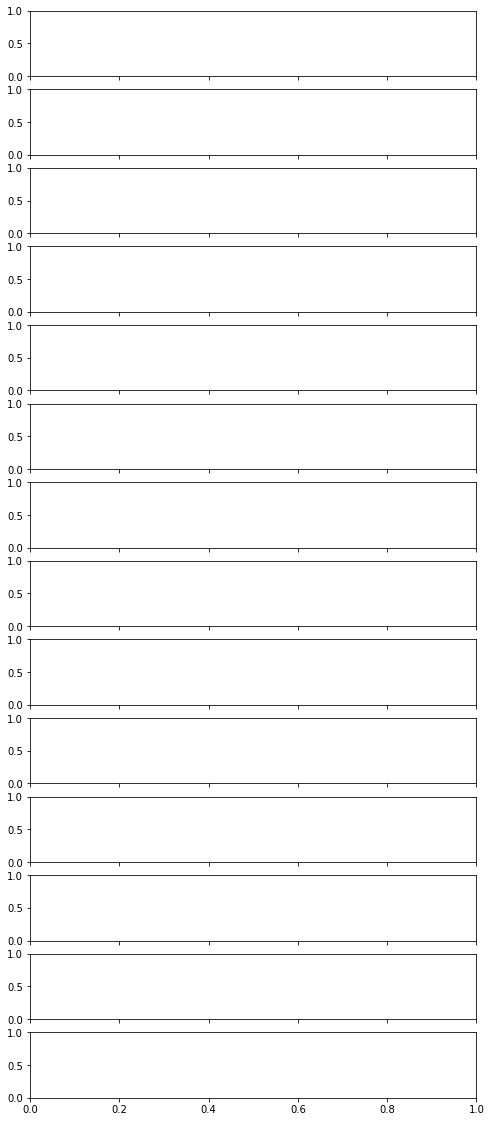

In [14]:
%matplotlib inline

f, axes = plt.subplots(data.n_inputs, 1, figsize=(8, 20), sharex=True)